### Import required libraries

In [10]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

### Get the dataset

In [11]:
column_names = ["user_id", "item_id", "rating", "timestamp"] # Taken from the documentation

df = pd.read_csv("./ml-100k-1/ml-100k/u.data", sep="\t", names= column_names)

df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [12]:
print(df.shape)

(100000, 4)


In [13]:
df["user_id"].nunique()

943

In [14]:
df["item_id"].nunique()

1682

In [15]:
movies_title = pd.read_csv("./ml-100k-1/ml-100k/u.item", sep="\|", header=None, encoding="latin-1")[[0,1]]

movies_title.columns = ["item_id", "title"]

movies_title

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [16]:
df_final = pd.merge(df, movies_title, how="inner", on = "item_id")

df_final

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [17]:
df_final.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


### Exporatory Data Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

In [19]:
# Get average rating of a specific item/movie
np.mean(df_final[df_final["item_id"] == 655]["rating"])

3.881057268722467

In [20]:
df_final.groupby(by="title")["rating"].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [21]:
df_final.groupby(by="title")["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [22]:
df_rating = pd.DataFrame(df_final.groupby(by="title")["rating"].mean().sort_values(ascending=False).reset_index())
df_vol = pd.DataFrame(df_final.groupby(by="title")["rating"].count().sort_values(ascending=False).reset_index())
df_stats = pd.merge(df_vol, df_rating, on = "title")
df_stats.columns = ["Title", "# of Ratings", "Rating"]
df_stats = df_stats.sort_values(["# of Ratings", "Rating"], ascending=False)
df_stats

,Title,# of Ratings,Rating
0,Star Wars (1977),583,4.358491
1,Contact (1997),509,3.803536
2,Fargo (1996),508,4.155512
3,Return of the Jedi (1983),507,4.007890
4,Liar Liar (1997),485,3.156701
...,...,...,...
1652,Hedd Wyn (1992),1,1.000000
1653,Touki Bouki (Journey of the Hyena) (1973),1,1.000000
1654,Girl in the Cadillac (1995),1,1.000000
1658,Office Killer (1997),1,1.000000


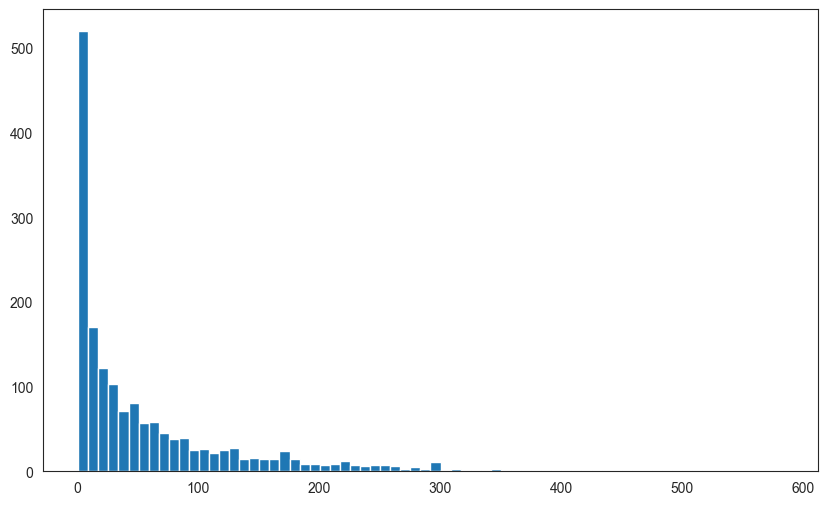

In [23]:
plt.figure(figsize=(10,6))
plt.hist(df_stats["# of Ratings"], bins=70)
plt.show()

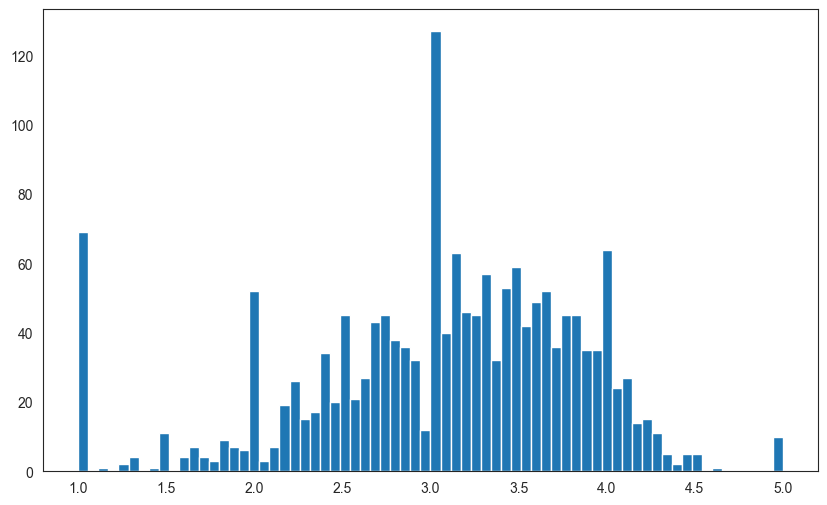

In [24]:
plt.figure(figsize=(10,6))
plt.hist(df_stats["Rating"], bins=70)
plt.show()

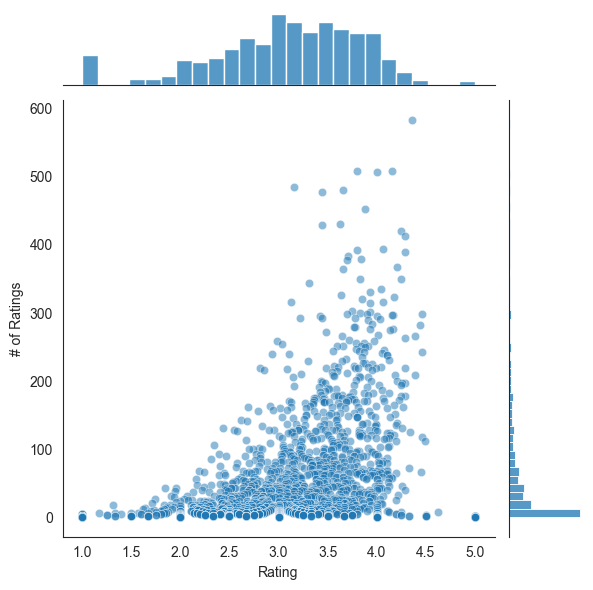

In [25]:
sns.jointplot(x= "Rating", y="# of Ratings", data=df_stats, alpha=0.5)

### Creating Movie Recommendation

In [26]:
df_final

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [27]:
movie_matrix = df_final.pivot_table(index="user_id", columns="title", values="rating")

movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [28]:
starwars_user_ratings = movie_matrix["Star Wars (1977)"]
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [29]:
similar_to_starwars = movie_matrix.corrwith(starwars_user_ratings)

corr_star_wars = pd.DataFrame(similar_to_starwars, columns=["Correlation"])

corr_star_wars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374
Zeus and Roxanne (1997),0.818182


In [30]:
corr_star_wars.dropna(inplace=True)

In [31]:
corr_star_wars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [32]:
corr_star_wars.sort_values("Correlation", ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [33]:
df_stats

,Title,# of Ratings,Rating
0,Star Wars (1977),583,4.358491
1,Contact (1997),509,3.803536
2,Fargo (1996),508,4.155512
3,Return of the Jedi (1983),507,4.007890
4,Liar Liar (1997),485,3.156701
...,...,...,...
1652,Hedd Wyn (1992),1,1.000000
1653,Touki Bouki (Journey of the Hyena) (1973),1,1.000000
1654,Girl in the Cadillac (1995),1,1.000000
1658,Office Killer (1997),1,1.000000


In [34]:
corr_star_wars = corr_star_wars.reset_index()

corr_star_wars

,title,Correlation
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398
...,...,...
1405,Young Guns (1988),0.186377
1406,Young Guns II (1990),0.228615
1407,"Young Poisoner's Handbook, The (1995)",-0.007374
1408,Zeus and Roxanne (1997),0.818182


In [35]:
corr_star_wars = pd.merge(corr_star_wars, df_stats, left_on="title", right_on="Title")

corr_star_wars = corr_star_wars[["Title", "Correlation", "# of Ratings"]]

corr_star_wars

,Title,Correlation,# of Ratings
0,'Til There Was You (1997),0.872872,9
1,1-900 (1994),-0.645497,5
2,101 Dalmatians (1996),0.211132,109
3,12 Angry Men (1957),0.184289,125
4,187 (1997),0.027398,41
...,...,...,...
1405,Young Guns (1988),0.186377,101
1406,Young Guns II (1990),0.228615,44
1407,"Young Poisoner's Handbook, The (1995)",-0.007374,41
1408,Zeus and Roxanne (1997),0.818182,6


In [36]:
corr_star_wars_filtered = corr_star_wars[corr_star_wars["# of Ratings"] > 100].reset_index(drop=True)

corr_star_wars_filtered

,Title,Correlation,# of Ratings
0,101 Dalmatians (1996),0.211132,109
1,12 Angry Men (1957),0.184289,125
2,2001: A Space Odyssey (1968),0.230884,259
3,Absolute Power (1997),0.085440,127
4,"Abyss, The (1989)",0.203709,151
...,...,...,...
329,Willy Wonka and the Chocolate Factory (1971),0.221902,326
330,"Wizard of Oz, The (1939)",0.266335,246
331,"Wrong Trousers, The (1993)",0.216204,118
332,Young Frankenstein (1974),0.192589,200


In [37]:
corr_star_wars_filtered.sort_values(by=["Correlation", "# of Ratings"], ascending=False).head(10)

,Title,Correlation,# of Ratings
291,Star Wars (1977),1.000000,583
98,"Empire Strikes Back, The (1980)",0.747981,367
251,Return of the Jedi (1983),0.672556,507
243,Raiders of the Lost Ark (1981),0.536117,420
23,Austin Powers: International Man of Mystery (1...,0.377433,130
294,"Sting, The (1973)",0.367538,241
160,Indiana Jones and the Last Crusade (1989),0.350107,331
232,Pinocchio (1940),0.347868,101
118,"Frighteners, The (1996)",0.332729,115
174,L.A. Confidential (1997),0.319065,297


### Predict Function

In [38]:
def predict_movies(movie_name, df, df_stats):
    movie_matrix = df.pivot_table(index="user_id", columns="title", values="rating")
    temp_movie_rating = movie_matrix[movie_name]
    similar_to_temp_movie = movie_matrix.corrwith(temp_movie_rating)
    corr_temp_movie = pd.DataFrame(similar_to_temp_movie, columns=["Correlation"])
    corr_temp_movie = corr_temp_movie.reset_index()
    corr_temp_movie = pd.merge(corr_temp_movie, df_stats, left_on="title", right_on="Title")
    corr_temp_movie = corr_temp_movie[["Title", "Correlation", "# of Ratings"]]
    corr_temp_movie_filtered = corr_temp_movie[corr_temp_movie["# of Ratings"] > 100].reset_index(drop=True)
    reccom_mov_list = corr_temp_movie_filtered.sort_values(by=["Correlation", "# of Ratings"], ascending=False)["Title"].to_list()[:11]
    reccom_mov_list = [x for x in reccom_mov_list if x != movie_name]
    return reccom_mov_list

In [39]:
predict_movies("Star Wars (1977)", df_final, df_stats)

['Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Raiders of the Lost Ark (1981)',
 'Austin Powers: International Man of Mystery (1997)',
 'Sting, The (1973)',
 'Indiana Jones and the Last Crusade (1989)',
 'Pinocchio (1940)',
 'Frighteners, The (1996)',
 'L.A. Confidential (1997)',
 'Wag the Dog (1997)']

In [40]:
predict_movies("101 Dalmatians (1996)", df_final, df_stats)

['Murder at 1600 (1997)',
 'Miracle on 34th Street (1994)',
 'Being There (1979)',
 'Remains of the Day, The (1993)',
 'Gone with the Wind (1939)',
 'Piano, The (1993)',
 'Under Siege (1992)',
 'Top Gun (1986)',
 'Arsenic and Old Lace (1944)',
 'Patton (1970)']

In [41]:
predict_movies("Stripes (1981)", df_final, df_stats)

['Star Wars (1977)',
 'Return of the Jedi (1983)',
 'Indiana Jones and the Last Crusade (1989)',
 'Monty Python and the Holy Grail (1974)',
 'When Harry Met Sally... (1989)',
 'Batman (1989)',
 'Face/Off (1997)',
 'Quiz Show (1994)',
 'Professional, The (1994)',
 'Under Siege (1992)',
 'L.A. Confidential (1997)']

### END OF SCRIPT